In [68]:
data <- read.csv("C:\\Users\\radha31\\Downloads\\cereals.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')

print(str(data))

'data.frame':	74 obs. of  16 variables:
 $ name    : chr  "100%_Bran" "100%_Natural_Bran" "All-Bran" "All-Bran_with_Extra_Fiber" ...
 $ mfr     : chr  "N" "Q" "K" "K" ...
 $ type    : chr  "C" "C" "C" "C" ...
 $ calories: int  70 120 70 50 110 110 110 130 90 90 ...
 $ protein : int  4 3 4 4 2 2 2 3 2 3 ...
 $ fat     : int  1 5 1 0 2 2 0 2 1 0 ...
 $ sodium  : int  130 15 260 140 200 180 125 210 200 210 ...
 $ fiber   : num  10 2 9 14 1 1.5 1 2 4 5 ...
 $ carbo   : num  5 8 7 8 14 10.5 11 18 15 13 ...
 $ sugars  : int  6 8 5 0 8 10 14 8 6 5 ...
 $ potass  : int  280 135 320 330 -1 70 30 100 125 190 ...
 $ vitamins: int  25 0 25 25 25 25 25 25 25 25 ...
 $ shelf   : int  3 3 3 3 3 1 2 3 1 3 ...
 $ weight  : num  1 1 1 1 1 1 1 1.33 1 1 ...
 $ cups    : num  0.33 1 0.33 0.5 0.75 0.75 1 0.75 0.67 0.67 ...
 $ rating  : num  68.4 34 59.4 93.7 34.4 ...
NULL


In [69]:
head(data)

name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1,0.33,68.40297
100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1,1.00,33.98368
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1,0.33,59.42551
All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1,0.50,93.70491
Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1,0.75,34.38484
Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.50954


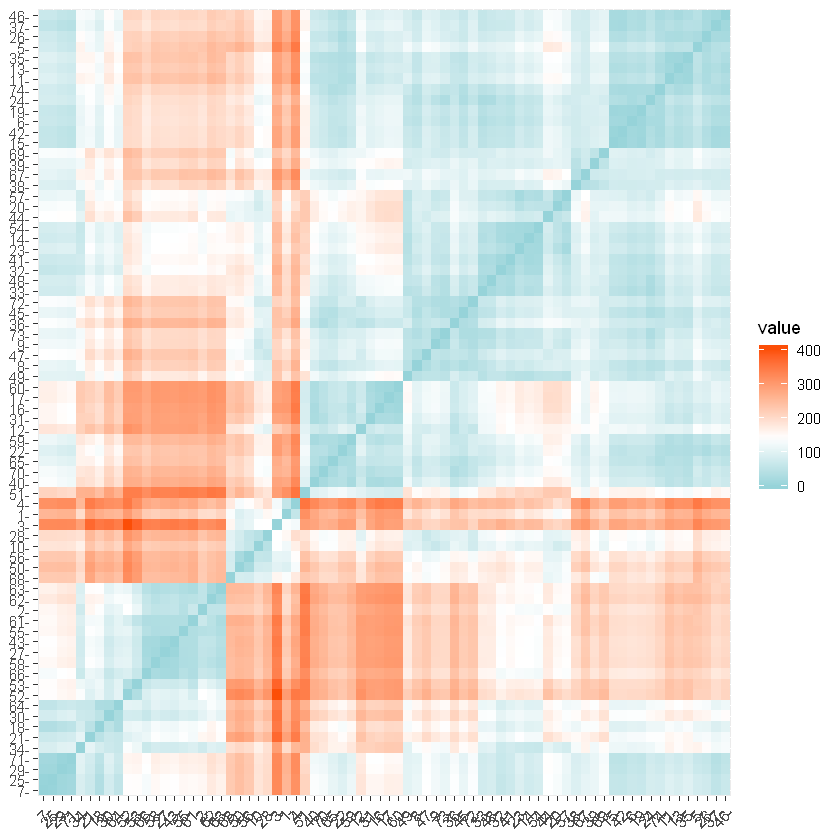

In [72]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering algorithms & visualization

df = data[c(-1,-2,-3)]
#df
#df scale(data)
output <- kmeans(df, centers = 10)
distance <- get_dist(df)
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

In [73]:
output

K-means clustering with 10 clusters of sizes 11, 8, 8, 8, 5, 12, 8, 7, 3, 4

Cluster means:
    calories  protein       fat     sodium     fiber     carbo    sugars
1   87.27273 2.727273 0.7272727   2.727273  2.154545 13.181818  2.545455
2  107.50000 1.750000 0.5000000 101.250000  0.625000 12.750000 11.625000
3  107.50000 2.500000 0.6250000 282.500000  0.500000 19.875000  3.375000
4  113.75000 1.875000 1.1250000 217.500000  0.625000 15.625000  7.375000
5  118.00000 3.000000 0.6000000 210.000000  5.000000 13.400000 11.400000
6  110.83333 3.083333 1.5833333 143.333333  2.583333 13.666667  6.750000
7  110.00000 1.625000 0.8750000 185.000000  0.437500 13.687500 10.125000
8  110.00000 2.714286 1.2857143 218.571429  2.642857 16.357143  6.142857
9   63.33333 4.000000 0.6666667 176.666667 11.000000  6.666667  3.666667
10 115.00000 2.500000 1.0000000 185.000000  1.500000 18.500000  5.250000
      potass   vitamins    shelf    weight      cups   rating
1   96.36364   9.090909 2.000000 0.8936364 

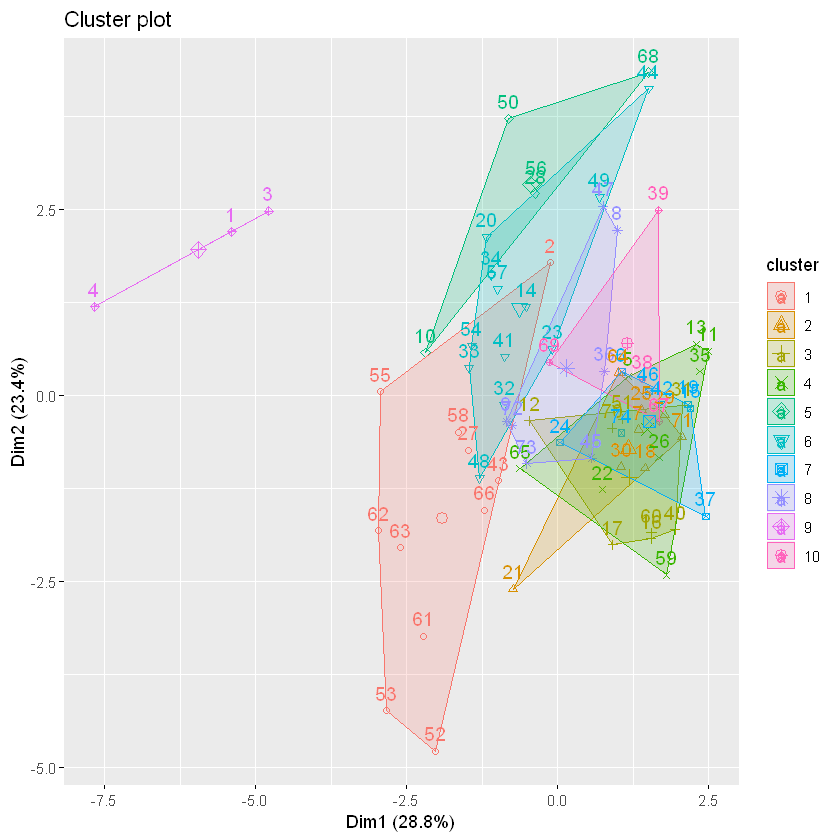

In [74]:
fviz_cluster(output, data = df)

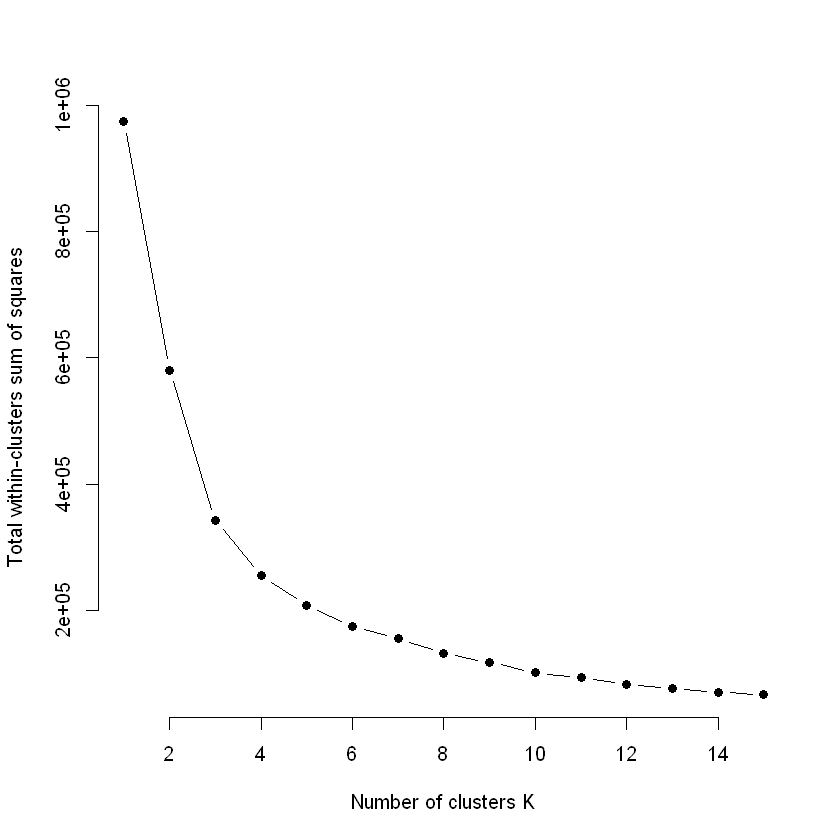

In [75]:
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(df, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k.values <- 1:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

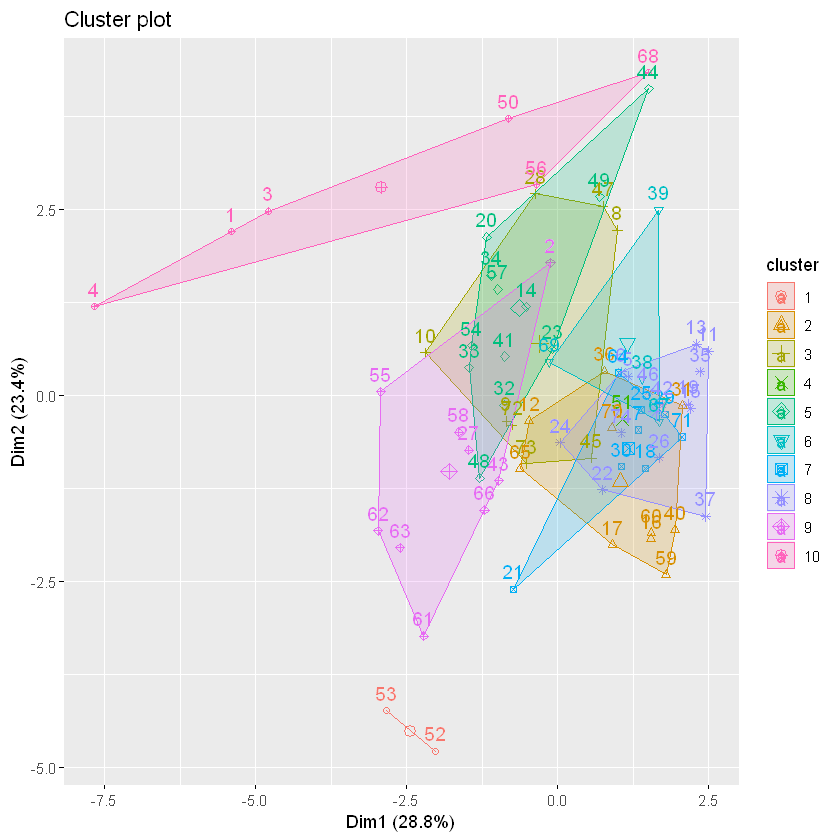

In [76]:
output <- kmeans(df, centers = 10)
fviz_cluster(output, data = df)

In [77]:
library(cluster)
library(fpc)

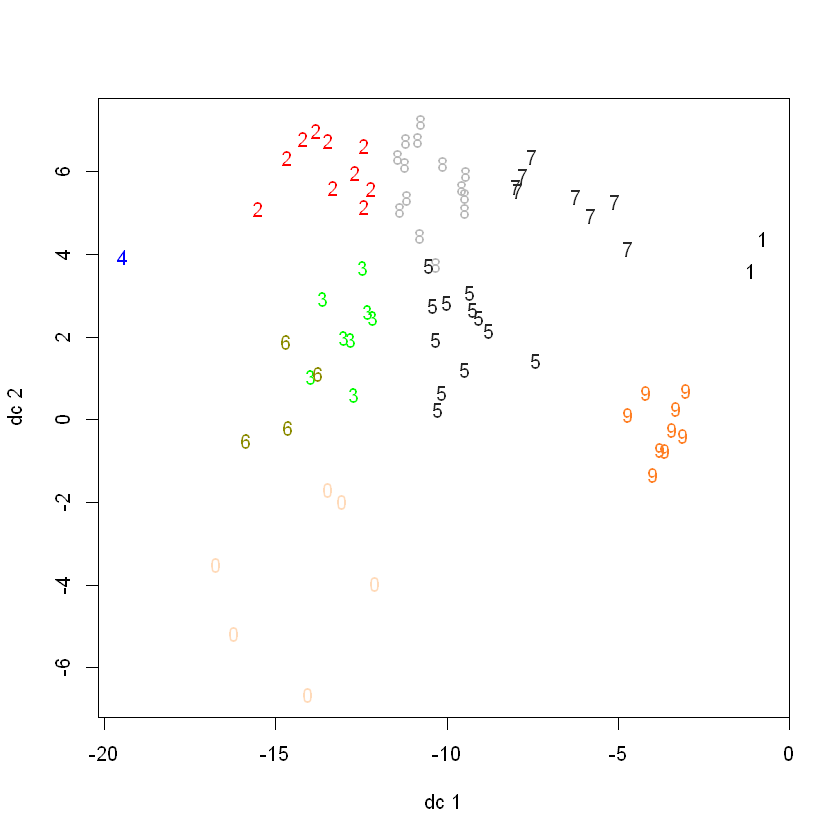

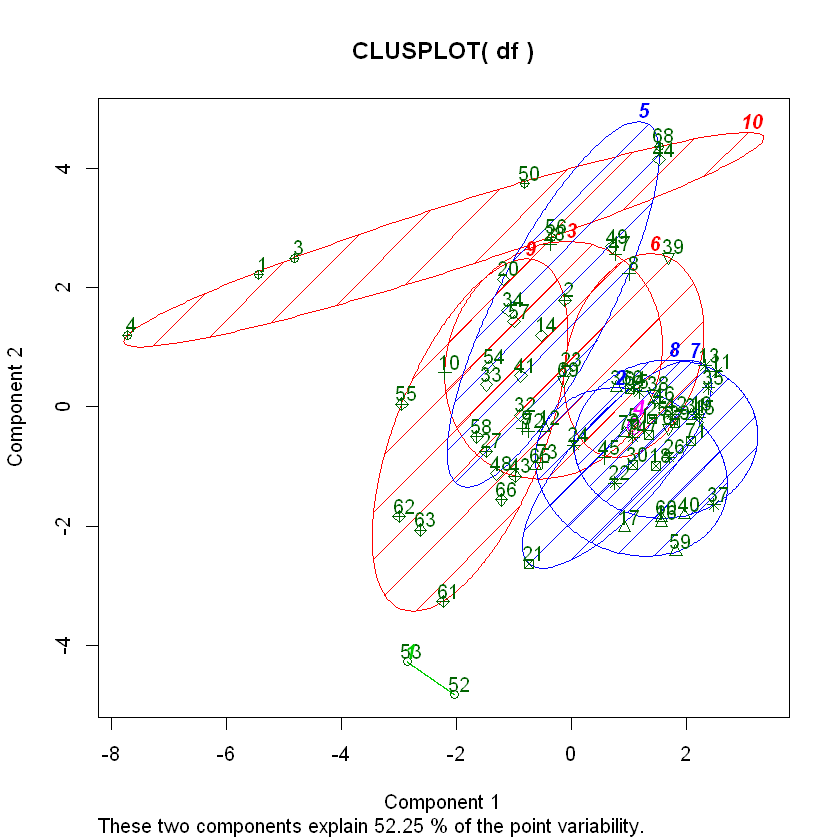

In [78]:
# Fig 01
plotcluster(df, output$cluster)

# More complex
clusplot(df, output$cluster, color=TRUE, shade=TRUE, 
         labels=2, lines=0)

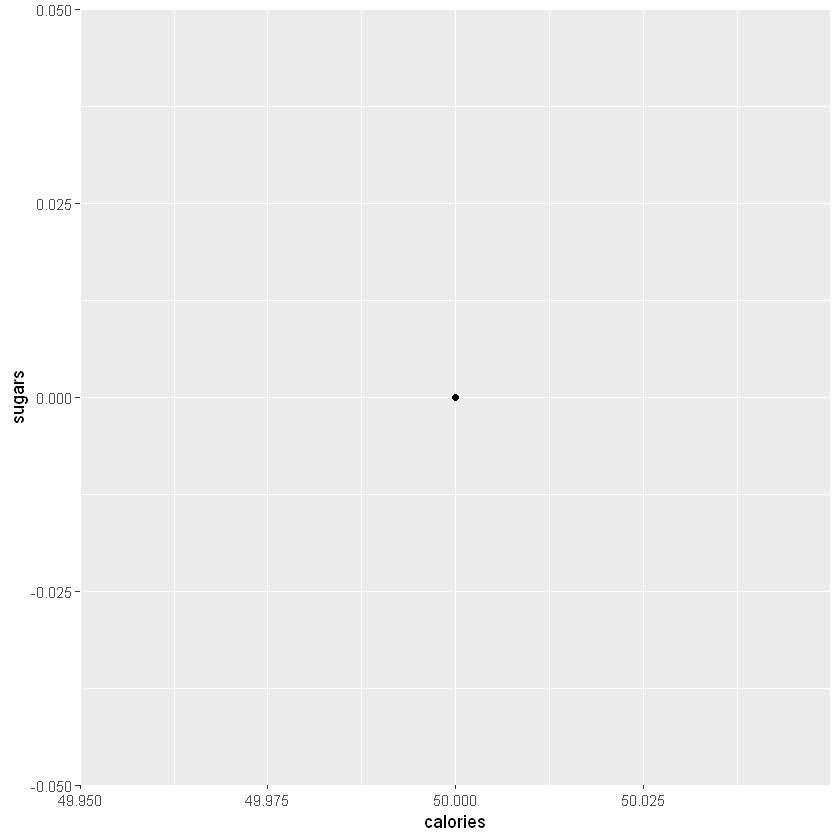

In [79]:

library("ggplot2")

ggplot(data=df[output$cluster==1,],
       aes(x=calories, y=sugars)) +
    geom_point()

Too few points to calculate an ellipse
Too few points to calculate an ellipse


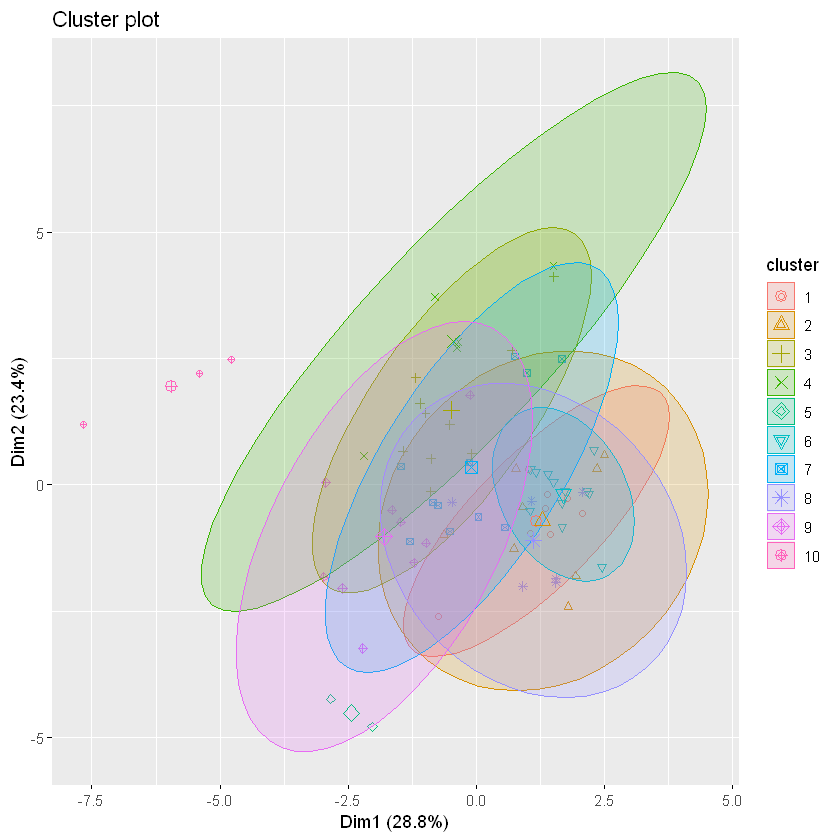

In [80]:
output <- kmeans(df, centers = 10)
#fviz_cluster(output$cluster==1, data = df)
fviz_cluster(output, geom = "point", ellipse.type = "norm", data=df)

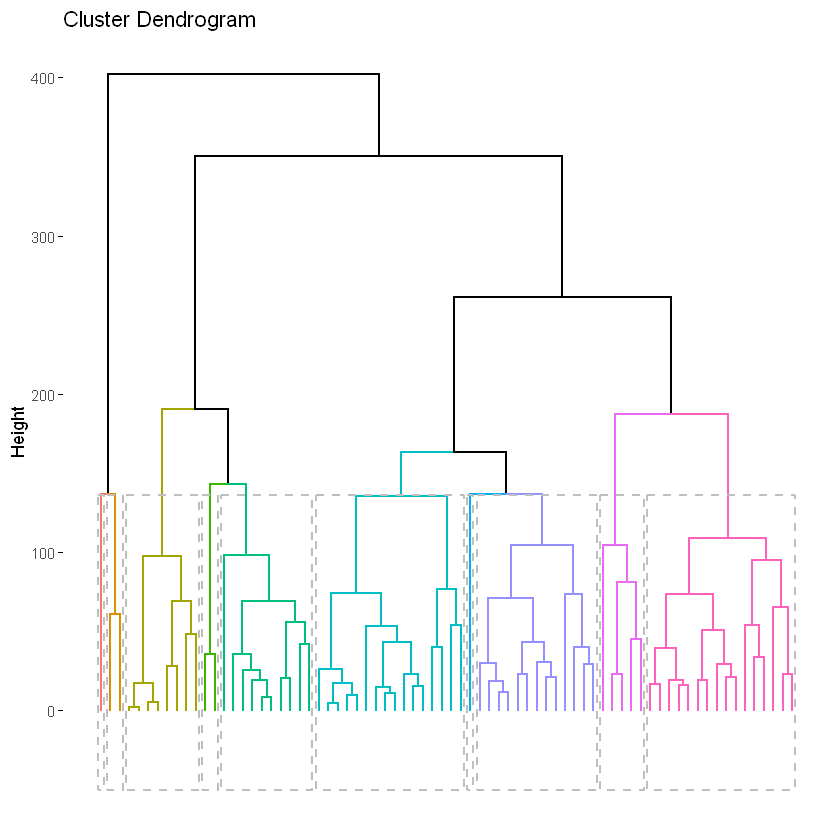

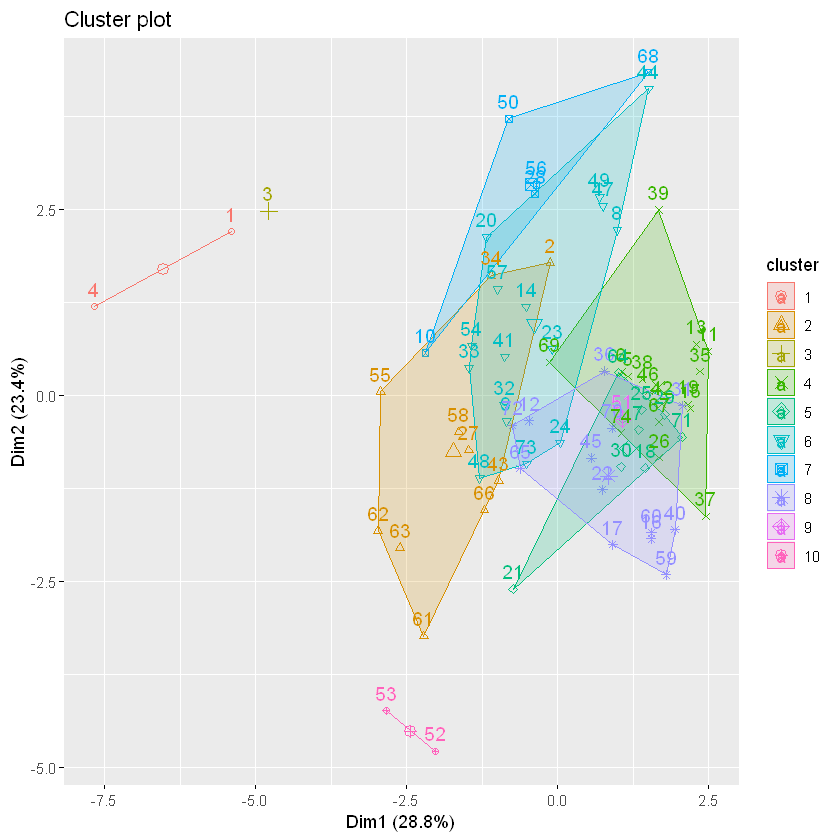

In [81]:
hc.cut <- hcut(df, k = 10, hc_method = "complete")
# Visualize dendrogram
fviz_dend(hc.cut, show_labels = FALSE, rect = TRUE)
# Visualize cluster
fviz_cluster(hc.cut, ellipse.type = "convex")

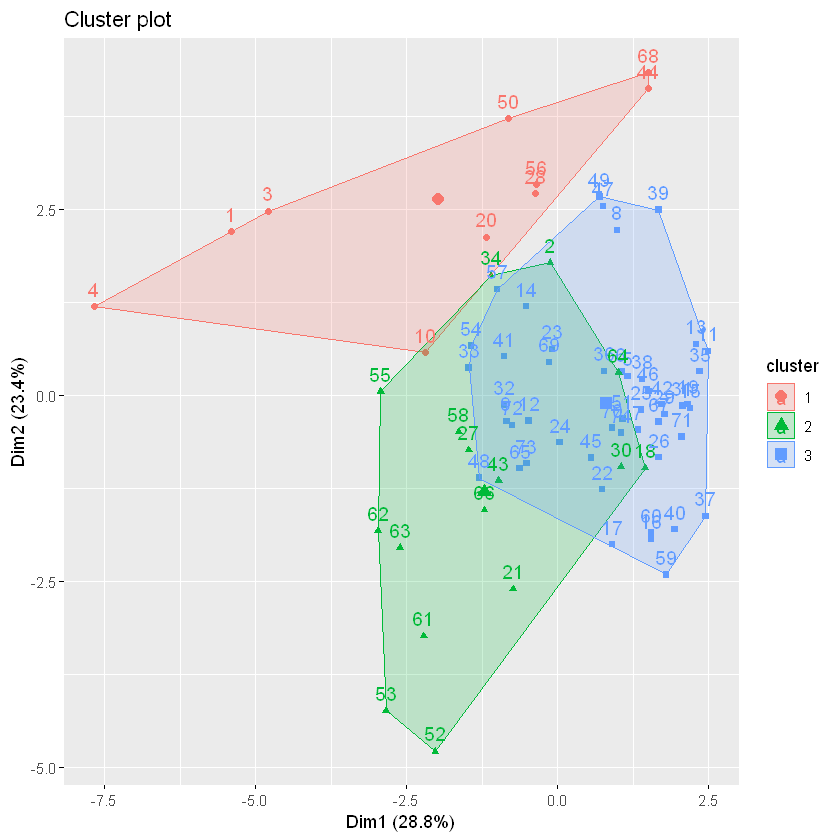

In [110]:
output <- kmeans(df, centers = 3)
x <- fviz_cluster(output, data = df)
fviz_cluster(output, data = df)

In [89]:
# str(x)
#head(x$data)

cl <- x$data
#head(cl$cluster==1)

subVal <- subset(cl, cl$cluster==2)

head(subVal)

,name,x,y,coord,cluster
1,1,-5.3983265,2.1976322,33.971516,2
3,3,-4.7863785,2.4752396,29.036230,2
4,4,-7.6657705,1.1893936,60.178694,2
10,10,-2.1902387,0.5673052,5.118981,2
20,20,-1.1767741,2.1229373,5.891660,2
28,28,-0.3731335,2.7071295,7.467779,2


In [90]:
subVal

,name,x,y,coord,cluster
1,1,-5.3983265,2.1976322,33.971516,2
3,3,-4.7863785,2.4752396,29.036230,2
4,4,-7.6657705,1.1893936,60.178694,2
10,10,-2.1902387,0.5673052,5.118981,2
20,20,-1.1767741,2.1229373,5.891660,2
28,28,-0.3731335,2.7071295,7.467779,2
44,44,1.5120850,4.1192830,19.254893,2
50,50,-0.8061229,3.7161165,14.459356,2
56,56,-0.3509571,2.8268552,8.114281,2
68,68,1.5086225,4.3375652,21.090414,2


,V1,V2,V3,V4,V5,V6
1,100%_Bran,1,-5.39832652167351,2.19763219219162,33.9715164867606,2
3,All-Bran,23,-4.78637845646174,2.4752395894533,29.0362297536781,2
4,All-Bran_with_Extra_Fiber,34,-7.66577046957828,1.18939363004191,60.1786940994427,2
10,Bran_Flakes,2,-2.19023872969515,0.567305227480277,5.11898091418306,2
20,Cracklin'_Oat_Bran,13,-1.17677408812999,2.12293729296358,5.89166000434969,2
28,Fruitful_Bran,21,-0.3731335458869,2.70712950375936,7.46777879319053,2
44,Mueslix_Crispy_Blend,39,1.51208500354843,4.11928298725536,19.2548933870475,2
50,Post_Nat._Raisin_Bran,46,-0.806122852089726,3.71611646266524,14.4593556167529,2
56,Raisin_Bran,52,-0.350957139253498,2.82685524370017,8.11428148242815,2
68,Total_Raisin_Bran,65,1.50862245789684,4.33756524526179,21.0904139773737,2


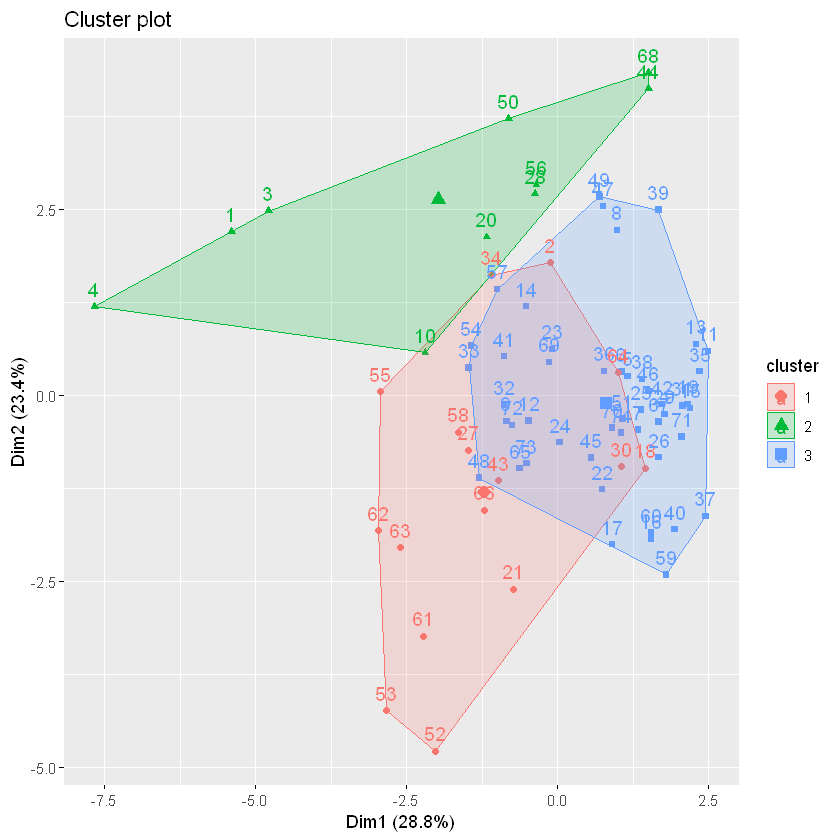

In [114]:

output <- kmeans(df, centers = 3)
x <- fviz_cluster(output, data = df)
fviz_cluster(output, data = df)
cl <- x$data
df2 <- cbind(data$name,cl$name,cl$x,cl$y,cl$coord,cl$cluster)
#df2
df3 <- as.data.frame(df2)
#str(df3)
#head(df3)
subset(df3, V6 == 2)


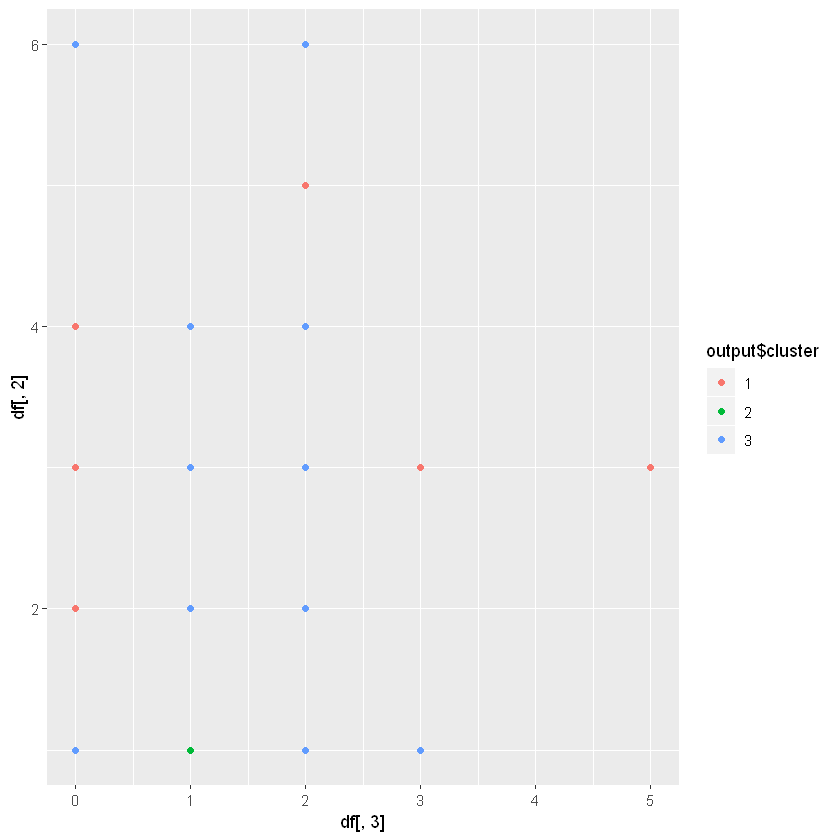

In [121]:
output$cluster <- as.factor(output$cluster )
ggplot(df, aes(df[,3],df[,2], color = output$cluster)) + geom_point()